# UniversalBank Data Analysis

## 1.0 Import and install python libraries


In [29]:
# import numpy and pandas libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier 



np.random.seed(1)



#### Changing the directory

In [30]:
import os
os.chdir('D:/BAIS/2nd Sem/DSP')
print(os.getcwd())

D:\BAIS\2nd Sem\DSP


## 2.0 Load data 

In [31]:
# load data
bank = pd.read_csv("./UniversalBank.csv")

## 3.0 Conduct initial exploration of the data
We have a number of input variables and one target variable. For this analysis, the target variable is CD Account.

First, our initial exploration of the data should answer the following questions:
1. How many rows and columns
2. How much of a problem do we have with na's?
3. What types of data are there?
4. What types of data are stored in columns
    1. identify which variables are numeric and may need to be standardized later
    2. identify which variables are categorical and may need to be transformed using and encoders such as one-hot-encoder.
5. Identify errors in the data - this is a common problem with categorical vars where the category is mispelled or spelled differently in some instances.

In [32]:
# look at the data
bank.head(3)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0


In [33]:
# generate a basic summary of the data
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [34]:
# generate a statistical summary of the numeric value in the data
bank.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [35]:
# Check the missing values by summing the total na's for each variable
bank.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [36]:
# create a list of these catagorical variables
category_var_list = list(bank.select_dtypes(include='object').columns)
category_var_list

[]

### Summary the findings from our initial evaluation of the data

* We have total 5000 rows and 14 columns
* We do not have any categorical variables
* We do not have any columns that have missing values

## 4.0 Process the data

### 4.1 Conduct any data prepartion that should be done *BEFORE* the data split.

1. As we will not be using the ID and the ZIP Code columns we will drop it. 
2. We dont have any observations (rows) due to missing na's we dont need to exclude any observations(rows).
3. As there are no categorical variables we do not want to encode them with any encoding technique. 

#### Drop any columns/variables we will not be using

In [37]:
# Dropping ID
bank.drop(['ID','ZIP Code'], axis=1, inplace = True)

### 4.2 Split data (train/test)

Splitting the data into two sets train and test for model training and testing. 

In [38]:
# split the data into validation and training set
train_df, test_df = train_test_split(bank, test_size=0.3)

# to reduce repetition in later code, creating variables to represent the columns
# that are predictors and target
target = 'CD Account'
predictors = list(bank.columns)
predictors.remove(target)

### 4.3  Conduct any data prepartion that should be done *AFTER* the data split

1. There are no missing numeric values in our data so we won't impute anything
2. We will remove differences of scale by standardizing the numerical variables



#### Standardize numeric values
Now, let's create a common scale between the numberic columns by standardizing each numeric column

In [39]:
# create a standard scaler and fit it to the training set of predictors
scaler = preprocessing.StandardScaler()
cols_to_stdize = ['Age','Experience','Income','Family',
                  'CCAvg','Education','Mortgage','Personal Loan',
                  'Securities Account','Online','CreditCard']                
               
# Transform the predictors of training and validation sets
train_df[cols_to_stdize] = scaler.fit_transform(train_df[cols_to_stdize]) # train_predictors is not a numpy array

test_df[cols_to_stdize] = scaler.transform(test_df[cols_to_stdize]) # validation_target is now a series object

### Variable creation to represent train, test data with target and predictor

In [40]:
X_train = train_df[predictors]
y_train = train_df[target] 
X_test = test_df[predictors]
y_test= test_df[target]

## 5.0 Model the data

First, let's create a dataframe to load the model performance metrics into.

In [41]:
performance = pd.DataFrame({"model": [], "Accuracy": [], "Precision": [], "Recall": [], "F1": []})

### 5.1  Logistic Regression 

### 5.1.1 Logistic Regression Random Search CV using default,L1,L2,Elastic,liblinear regularization

Conduct an initial random search across a wide range of possible parameters.

In [42]:
score_measure = "recall"
kfolds = 5

param_grid = {
    'max_iter':np.arange(500,1000),
    'penalty': ['None','l1','l2','elasticnet'],
    'solver':['saga','liblinear']
}

log_reg_model = LogisticRegression()
rand_search = RandomizedSearchCV(estimator = log_reg_model, param_distributions=param_grid, cv=kfolds, n_iter=500,
                           scoring=score_measure, verbose=1, n_jobs=-1, 
                           return_train_score=True)

_ = rand_search.fit(X_train, y_train)

print(f"The best {score_measure} score is {rand_search.best_score_}")
print(f"... with parameters: {rand_search.best_params_}")

Fitting 5 folds for each of 500 candidates, totalling 2500 fits
The best recall score is 0.6662790697674419
... with parameters: {'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 707}


C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
1180 fits failed out of a total of 2500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
270 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 457, in _check_solver
    raise ValueError(

### 5.1.2 Logistic Regression Grid Search CV using default,L1,L2,Elastic,liblinear regularization

Conduct an exhaustive search across a smaller range of parameters around the parameters found in the initial random search.

In [43]:
score_measure = "recall"
kfolds = 5
max_iter = rand_search.best_params_['max_iter']
penalty = rand_search.best_params_['penalty']
solver = rand_search.best_params_['solver']

param_grid = {
    'max_iter': np.arange(max_iter-5,max_iter+5),  
    'penalty': [penalty],
    'solver': [solver]
}

log_reg_model = LogisticRegression()
grid_search = GridSearchCV(estimator = log_reg_model, param_grid=param_grid, cv=kfolds, 
                           scoring=score_measure, verbose=1, n_jobs=-1,
                           return_train_score=True)

_ = grid_search.fit(X_train, y_train)

print(f"The best {score_measure} score is {grid_search.best_score_}")
print(f"... with parameters: {grid_search.best_params_}")

bestRecallLogistic = grid_search.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
The best recall score is 0.6662790697674419
... with parameters: {'max_iter': 702, 'penalty': 'l1', 'solver': 'liblinear'}


In [44]:
c_matrix = confusion_matrix(y_test, grid_search.predict(X_test))
TP = c_matrix[1][1]
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]
performance = pd.concat([performance, pd.DataFrame({'model':"Logistic Regression", 
                                                    'Accuracy': [(TP+TN)/(TP+TN+FP+FN)], 
                                                    'Precision': [TP/(TP+FP)], 
                                                    'Recall': [TP/(TP+FN)], 
                                                    'F1': [2*TP/(2*TP+FP+FN)]
                                                     }, index=[0])])

### 5.2  Support Vector Machine 

### 5.2.1 SVM Random Search CV using linear, rbf and poly kernal

Conduct an initial random search across a wide range of possible parameters.

In [45]:
score_measure = "recall"
kfolds = 5

param_grid = {
    'C': np.arange(1,25),   
    'gamma': ['scale','auto'],
    'kernel':['linear','rbf','poly']
}

svm_model = SVC()
rand_search = RandomizedSearchCV(estimator = svm_model, param_distributions=param_grid, cv=kfolds, n_iter=500,
                           scoring=score_measure, verbose=1, n_jobs=-1, 
                           return_train_score=True)

_ = rand_search.fit(X_train, y_train)

print(f"The best {score_measure} score is {rand_search.best_score_}")
print(f"... with parameters: {rand_search.best_params_}")

C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 144 is smaller than n_iter=500. Running 144 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 144 candidates, totalling 720 fits
The best recall score is 0.6754756871035941
... with parameters: {'kernel': 'rbf', 'gamma': 'scale', 'C': 13}


### 5.2.2 SVM Grid Search CV using linear, rbf and poly kernal

Conduct an exhaustive search across a smaller range of parameters around the parameters found in the initial random search.

In [46]:
score_measure = "recall"
kfolds = 5

C = rand_search.best_params_['C']
gamma = rand_search.best_params_['gamma']
kernel = rand_search.best_params_['kernel']

param_grid = {
    'C': np.arange(C-2,C+2),  
    'gamma': [gamma],
    'kernel': [kernel]
    
}

svm_model = SVC()
grid_search = GridSearchCV(estimator = svm_model, param_grid=param_grid, cv=kfolds, 
                           scoring=score_measure, verbose=1, n_jobs=-1,
                           return_train_score=True)

_ = grid_search.fit(X_train, y_train)

print(f"The best {score_measure} score is {grid_search.best_score_}")
print(f"... with parameters: {grid_search.best_params_}")

bestRecallSVM = grid_search.best_estimator_

Fitting 5 folds for each of 4 candidates, totalling 20 fits
The best recall score is 0.6754756871035941
... with parameters: {'C': 13, 'gamma': 'scale', 'kernel': 'rbf'}


In [47]:
c_matrix = confusion_matrix(y_test, grid_search.predict(X_test))
TP = c_matrix[1][1]
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]
performance = pd.concat([performance, pd.DataFrame({'model':"SVM", 
                                                    'Accuracy': [(TP+TN)/(TP+TN+FP+FN)], 
                                                    'Precision': [TP/(TP+FP)], 
                                                    'Recall': [TP/(TP+FN)], 
                                                    'F1': [2*TP/(2*TP+FP+FN)]
                                                     }, index=[0])])

### 5.3 Decision Tree Classifer

#### 5.3.1 DTree Random Search CV

Conduct an initial random search across a wide range of possible parameters.

In [48]:
score_measure = "recall"
kfolds = 5

param_grid = {
    'min_samples_split': np.arange(1,100),  
    'min_samples_leaf': np.arange(1,100),
    'min_impurity_decrease': np.arange(0.0001, 0.01, 0.0005),
    'max_leaf_nodes': np.arange(5, 100), 
    'max_depth': np.arange(1,50), 
    'criterion': ['entropy', 'gini'],
}

dtree = DecisionTreeClassifier()
rand_search = RandomizedSearchCV(estimator = dtree, param_distributions=param_grid, cv=kfolds, n_iter=500,
                           scoring=score_measure, verbose=1, n_jobs=-1, 
                           return_train_score=True)

_ = rand_search.fit(X_train, y_train)

print(f"The best {score_measure} score is {rand_search.best_score_}")
print(f"... with parameters: {rand_search.best_params_}")

Fitting 5 folds for each of 500 candidates, totalling 2500 fits
The best recall score is 0.7029598308668076
... with parameters: {'min_samples_split': 99, 'min_samples_leaf': 7, 'min_impurity_decrease': 0.0091, 'max_leaf_nodes': 90, 'max_depth': 16, 'criterion': 'entropy'}


C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 2500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\priya\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 250, in fit
    raise ValueError(
ValueError: min_samples_split must be an integer greater than 1 or a float in (

#### 5.3.2 DTree Grid Search CV

Conduct an exhaustive search across a smaller range of parameters around the parameters found in the initial random search.

In [49]:
score_measure = "recall"
kfolds = 5
min_samples_split = rand_search.best_params_['min_samples_split']
min_samples_leaf = rand_search.best_params_['min_samples_leaf']
min_impurity_decrease = rand_search.best_params_['min_impurity_decrease']
max_leaf_nodes = rand_search.best_params_['max_leaf_nodes']
max_depth = rand_search.best_params_['max_depth']
criterion = rand_search.best_params_['criterion']

param_grid = {
    'min_samples_split': np.arange(min_samples_split-2,min_samples_split+2),  
    'min_samples_leaf': np.arange(min_samples_leaf-2,min_samples_leaf+2),
    'min_impurity_decrease': np.arange(min_impurity_decrease-0.0001, min_impurity_decrease+0.0001, 0.00005),
    'max_leaf_nodes': np.arange(max_leaf_nodes-2,max_leaf_nodes+2), 
    'max_depth': np.arange(max_depth-2,max_depth+2), 
    'criterion': [criterion]
}

dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid=param_grid, cv=kfolds, 
                           scoring=score_measure, verbose=1, n_jobs=-1,
                           return_train_score=True)

_ = grid_search.fit(X_train, y_train)

print(f"The best {score_measure} score is {grid_search.best_score_}")
print(f"... with parameters: {grid_search.best_params_}")

bestRecallTree = grid_search.best_estimator_

Fitting 5 folds for each of 1024 candidates, totalling 5120 fits
The best recall score is 0.7029598308668076
... with parameters: {'criterion': 'entropy', 'max_depth': 14, 'max_leaf_nodes': 88, 'min_impurity_decrease': 0.009000000000000001, 'min_samples_leaf': 5, 'min_samples_split': 97}


In [50]:
c_matrix = confusion_matrix(y_test, grid_search.predict(X_test))
TP = c_matrix[1][1]
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]
performance = pd.concat([performance, pd.DataFrame({'model':"Decision Tree", 
                                                    'Accuracy': [(TP+TN)/(TP+TN+FP+FN)], 
                                                    'Precision': [TP/(TP+FP)], 
                                                    'Recall': [TP/(TP+FN)], 
                                                    'F1': [2*TP/(2*TP+FP+FN)]
                                                     }, index=[0])])

### 5.3.4 Diagrams of the Dtree:

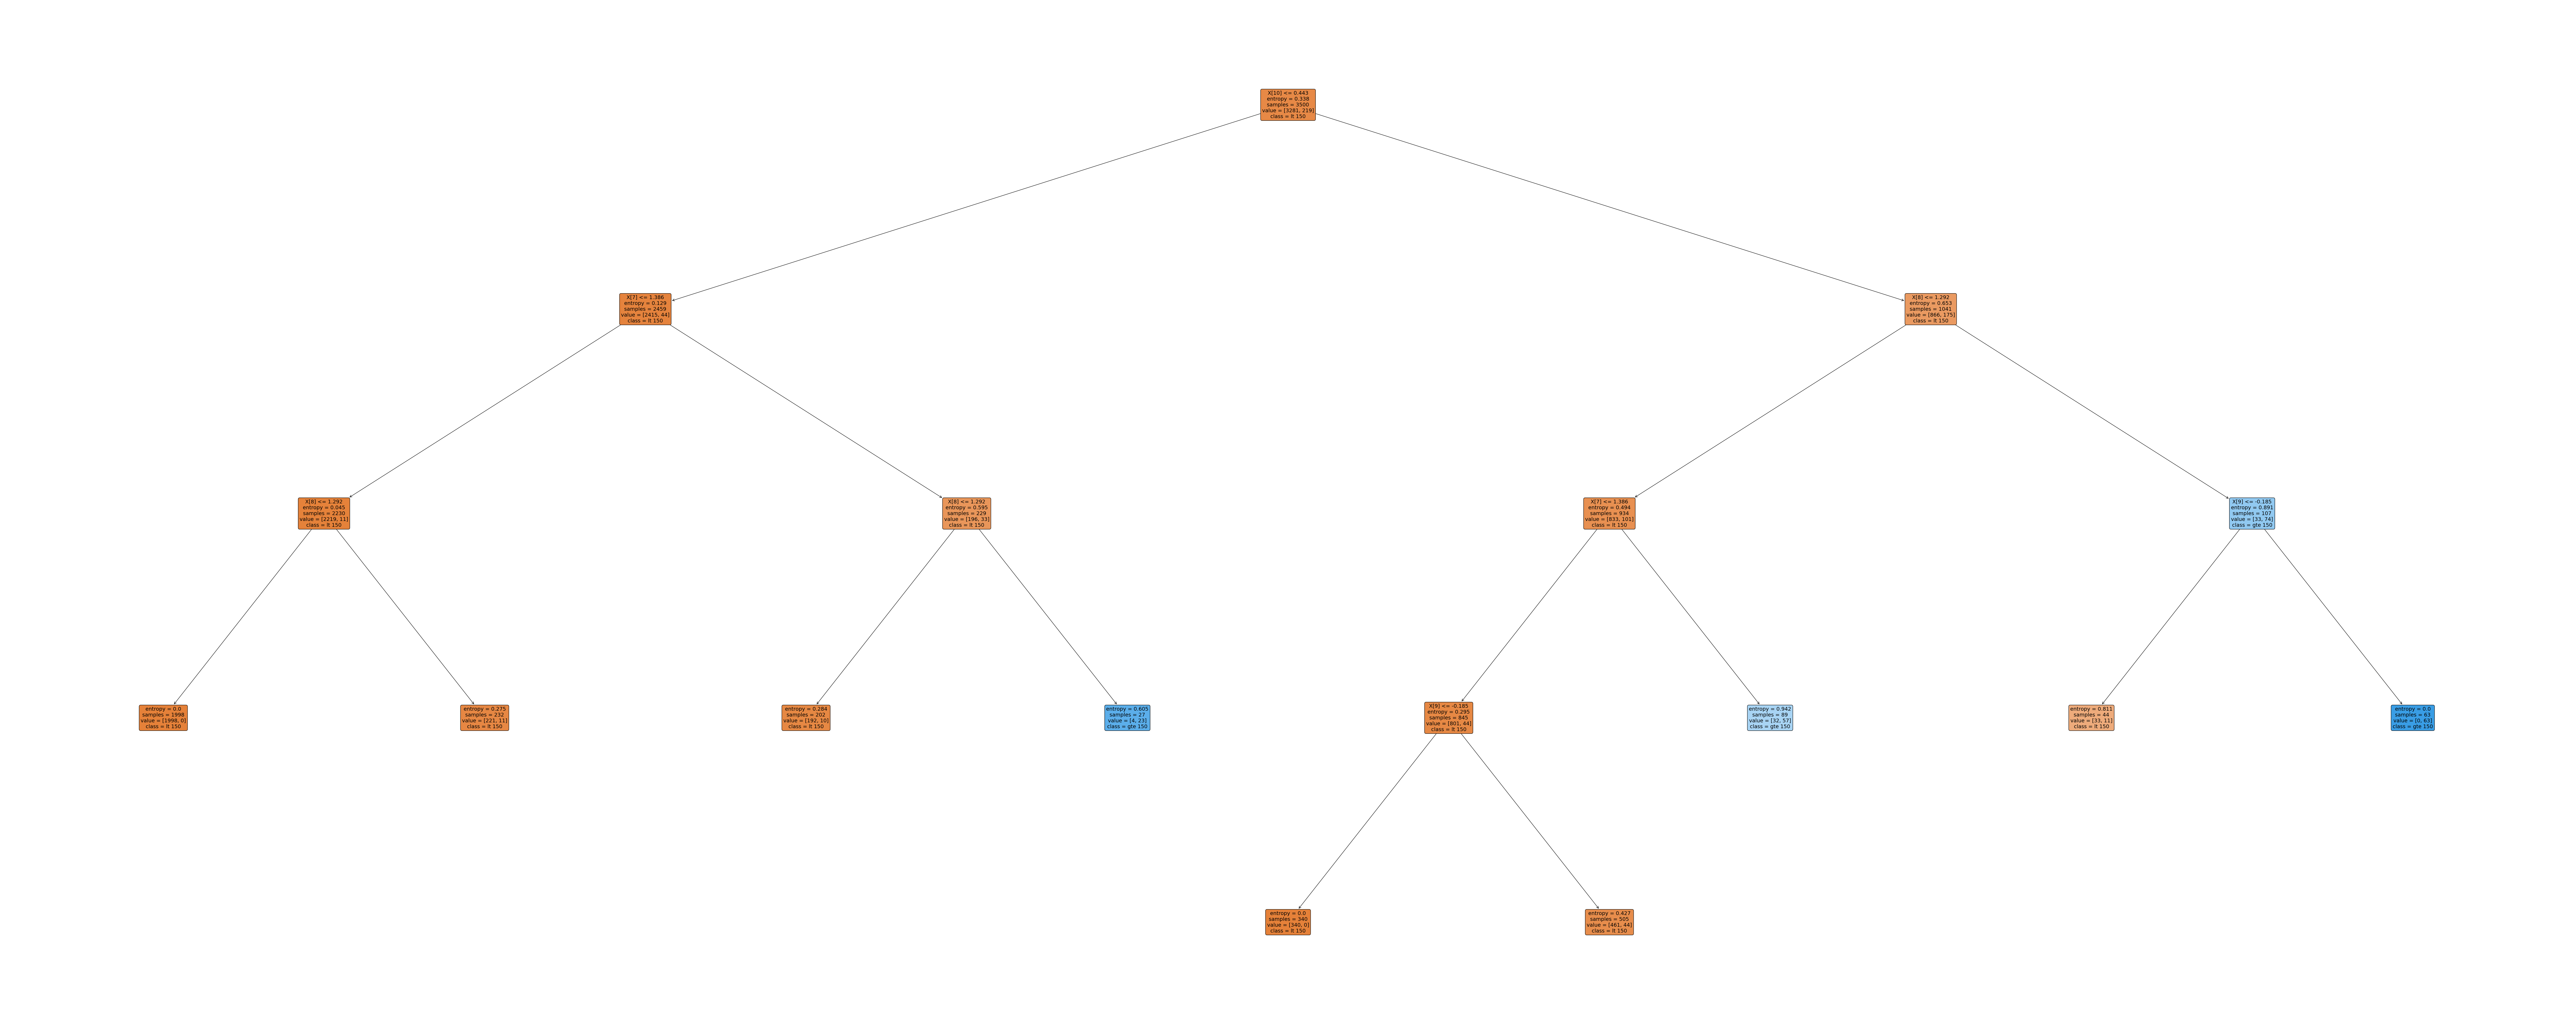

In [51]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(125,50))
tree = plot_tree(grid_search.best_estimator_,
              class_names=['lt 150', 'gte 150'], 
              filled=True, 
              rounded=True, 
              fontsize=14)

In [52]:
bestRecallLogistic

LogisticRegression(max_iter=702, penalty='l1', solver='liblinear')

In [53]:
bestRecallSVM

SVC(C=13)

In [54]:
bestRecallTree

DecisionTreeClassifier(criterion='entropy', max_depth=14, max_leaf_nodes=88,
                       min_impurity_decrease=0.009000000000000001,
                       min_samples_leaf=5, min_samples_split=97)

## 6.0 Summary

Sorted by recall, the best models are:

In [55]:
performance.sort_values(by=['Recall'])

,model,Accuracy,Precision,Recall,F1
0,Logistic Regression,0.978000,1.000000,0.602410,0.751880
0,SVM,0.974667,0.909091,0.602410,0.724638
0,Decision Tree,0.964667,0.697368,0.638554,0.666667


## 7.0 Analysis

#### We will consider recall value for our model because finding true positive is more important. 
#### Seeing the summary table above, we can say that the Decision Tree model has the best recall value with a recall value of 0.638554 which is greater than SVM and Logistic Regression recall value. 